In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tweepy, json
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
import re
import time
import nltk

In [ ]:
!pip install  text_preprocessing

     |████████████████████████████████| 58.4 MB 1.2 MB/s 
     |████████████████████████████████| 2.7 MB 33.5 MB/s 
     |████████████████████████████████| 287 kB 29.6 MB/s 
     |████████████████████████████████| 106 kB 53.5 MB/s 
     |████████████████████████████████| 10.1 MB 7.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for names-dataset: filename=names_dataset-3.1.0-py3-none-any.whl size=116832781 sha256=3c80e4adf205430cddad8cca005e82ecaeba102281b7f3d919b15c08f4722778
  Stored in directory: /root/.cache/pip/wheels/1b/59/19/b3a2b3fe7477148739ddd6e588ea3b2fb713188c8e5e2f31ac
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681845 sha256=869bc95d6fa3b28f3f13573afece3b8790620c4e1efffa9a9f7b00aae6da262f
  Stored in directory: /root/.cache/pip/wheels/0e/06/e8/7ee176e95ea9a8a8c3b3afcb1869f20adbd42413d4611c6eb4
Successfully built names-dataset pycou

In [ ]:
import text_preprocessing
import string

!pip install contractions
import contractions

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

import string
punc = string.punctuation

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

nltk.download('averaged_perceptron_tagger')

nltk.download('wordnet')
from nltk.corpus import wordnet

from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving HASCOLv3.csv to HASCOLv3.csv


In [ ]:
h = pd.read_csv('PSOcsv.csv' , encoding = 'latin')
h

,USER ID,DATE,TIME,Unnamed: 3,Unnamed: 4,Unnamed: 5,TWITTER HANDLE,TWEETS,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,1301031490428559360,02/09/2020,10:37:33,Pakistan,Standard,Time,AftabMaken,Pakistan State Oil #PSO reported loss after t...,NaN,NaN,NaN,NaN
1,1301030438790664195,02/09/2020,10:33:23,Pakistan,Standard,Time,brecordernews,PSO: FY20 scarred by inventory losses Out of ...,NaN,NaN,NaN,NaN
2,1300882064884076545,02/09/2020,00:43:48,Pakistan,Standard,Time,Aliwazirna50,Pakistan state oil petroleum,NaN,NaN,NaN,NaN
3,1300841442412318720,01/09/2020,22:02:22,Pakistan,Standard,Time,TheFrontierPost,Pakistan State Oil announces results for fina...,NaN,NaN,NaN,NaN
4,1300746070809546753,01/09/2020,15:43:24,Pakistan,Standard,Time,ibakarachi,The IBA Karachi congratulates our Alumnus of ...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1932,684734520168415233,06/01/2016,18:53:26,Pakistan,Standard,Time,SardarRaeesPTI,PSO (Pakistan State Oil) is without any board...,NaN,NaN,NaN,NaN
1933,684732909681520640,06/01/2016,18:47:02,Pakistan,Standard,Time,Wasim_Wazir,PSO (Pakistan State Oil) is without any board...,NaN,NaN,NaN,NaN
1934,684342312500002816,05/01/2016,16:54:56,Pakistan,Standard,Time,pkfinanceinfo,Pakistan State Oil  PSO; Stock sorted by Tot...,NaN,NaN,NaN,NaN
1935,683406775631089664,03/01/2016,02:57:27,Pakistan,Standard,Time,iamAbdulz,@Shell & Pakistan State Oil found inaccuracie...,NaN,NaN,NaN,NaN


In [ ]:

def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = contractions.fix(text)
    return text


def text_preprocessing(text):
    """
    Cleaning and parsing the text.

    """
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    nopunc = clean_text(text)
    tokenized_text = tokenizer.tokenize(nopunc)
    remove_stopwords = [w for w in tokenized_text if w not in stopwords.words('english')]
    combined_text = ' '.join(tokenized_text)
    return combined_text

In [ ]:
h['text_clean'] = h['TWEETS'].apply(str).apply(lambda x: text_preprocessing(x))
h

,USER ID,DATE,TIME,Unnamed: 3,Unnamed: 4,Unnamed: 5,TWITTER HANDLE,TWEETS,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,text_clean
0,1301031490428559360,02/09/2020,10:37:33,Pakistan,Standard,Time,AftabMaken,Pakistan State Oil #PSO reported loss after t...,NaN,NaN,NaN,NaN,pakistan state oil pso reported loss after tax...
1,1301030438790664195,02/09/2020,10:33:23,Pakistan,Standard,Time,brecordernews,PSO: FY20 scarred by inventory losses Out of ...,NaN,NaN,NaN,NaN,pso scarred by inventory losses out of the tot...
2,1300882064884076545,02/09/2020,00:43:48,Pakistan,Standard,Time,Aliwazirna50,Pakistan state oil petroleum,NaN,NaN,NaN,NaN,pakistan state oil petroleum
3,1300841442412318720,01/09/2020,22:02:22,Pakistan,Standard,Time,TheFrontierPost,Pakistan State Oil announces results for fina...,NaN,NaN,NaN,NaN,pakistan state oil announces results for finan...
4,1300746070809546753,01/09/2020,15:43:24,Pakistan,Standard,Time,ibakarachi,The IBA Karachi congratulates our Alumnus of ...,NaN,NaN,NaN,NaN,the iba karachi congratulates our alumnus of m...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1932,684734520168415233,06/01/2016,18:53:26,Pakistan,Standard,Time,SardarRaeesPTI,PSO (Pakistan State Oil) is without any board...,NaN,NaN,NaN,NaN,pso pakistan state oil is without any board fr...
1933,684732909681520640,06/01/2016,18:47:02,Pakistan,Standard,Time,Wasim_Wazir,PSO (Pakistan State Oil) is without any board...,NaN,NaN,NaN,NaN,pso pakistan state oil is without any board fr...
1934,684342312500002816,05/01/2016,16:54:56,Pakistan,Standard,Time,pkfinanceinfo,Pakistan State Oil  PSO; Stock sorted by Tot...,NaN,NaN,NaN,NaN,pakistan state oil pso stock sorted by total s...
1935,683406775631089664,03/01/2016,02:57:27,Pakistan,Standard,Time,iamAbdulz,@Shell & Pakistan State Oil found inaccuracie...,NaN,NaN,NaN,NaN,she will pakistan state oil found inaccuracies...


In [ ]:
h

,USER ID,DATE,TIME,Unnamed: 3,Unnamed: 4,Unnamed: 5,TWITTER HANDLE,TWEET,Unnamed: 8,Unnamed: 9,text_clean
0,1265724372754579461,28/05/2020,00:19:41,Pakistan,Standard,Time,MikeWamunyinyi,This attack on Ruto by Raila must stop. It's ...,NaN,NaN,this attack on ruto by raila must stop its is ...
1,1264974281638924288,25/05/2020,22:39:05,Pakistan,Standard,Time,BlackbeakTog,EUA never was closet Bolsonaro always be Trum...,NaN,NaN,eua never was closet bolsonaro always be trump...
2,1263112949700407296,20/05/2020,19:22:49,Pakistan,Standard,Time,IraqPetroleum,Iraq: Daesh militants attack power lines in D...,NaN,NaN,iraq daesh militants attack power lines in diy...
3,1263091744838529024,20/05/2020,17:58:33,Pakistan,Standard,Time,HoneyJawla,Shut up it doesn't mean they can attack India...,NaN,NaN,shut up it does not mean they can attack india...
4,1263071862109507585,20/05/2020,16:39:33,Pakistan,Standard,Time,Fatbob2013,Crayons are made from petroleum products........,NaN,NaN,crayons are made from petroleum productshahaha...
...,...,...,...,...,...,...,...,...,...,...,...
2455,684082328788963329,04/01/2016,23:41:51,Pakistan,Standard,Time,LibyaschannelEN,Chairman of (HoR-appointed) National Oil Corp...,NaN,NaN,chairman of horappointed national oil corpnaji...
2456,683971331151540224,04/01/2016,16:20:47,Pakistan,Standard,Time,SamiBerriwen,#Libya | Petroleum Facilities Guard order the...,NaN,NaN,libya petroleum facilities guard order the mai...
2457,683871318169776128,04/01/2016,09:43:22,Pakistan,Standard,Time,WordyOfMuses,(cont) an entire nation hate a religion in o...,NaN,NaN,cont an entire nation hate a religion in order...
2458,683487857386909697,03/01/2016,08:19:38,Pakistan,Standard,Time,aaklubi,@MLockewp Search for al-mohaya compound bombi...,NaN,NaN,mlockewp search for almohaya compound bombing ...


In [ ]:
!pip install arrow
import arrow
from nltk.sentiment.vader import SentimentIntensityAnalyzer

     |████████████████████████████████| 64 kB 2.0 MB/s 


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
#load VADER
analyzer = SentimentIntensityAnalyzer()

h['compound'] = [analyzer.polarity_scores(v)['compound'] for v in h['text_clean']]

h.head(3)

,USER ID,DATE,TIME,Unnamed: 3,Unnamed: 4,Unnamed: 5,TWITTER HANDLE,TWEETS,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,text_clean,compound
0,1301031490428559360,02/09/2020,10:37:33,Pakistan,Standard,Time,AftabMaken,Pakistan State Oil #PSO reported loss after t...,NaN,NaN,NaN,NaN,pakistan state oil pso reported loss after tax...,-0.3400
1,1301030438790664195,02/09/2020,10:33:23,Pakistan,Standard,Time,brecordernews,PSO: FY20 scarred by inventory losses Out of ...,NaN,NaN,NaN,NaN,pso scarred by inventory losses out of the tot...,-0.8402
2,1300882064884076545,02/09/2020,00:43:48,Pakistan,Standard,Time,Aliwazirna50,Pakistan state oil petroleum,NaN,NaN,NaN,NaN,pakistan state oil petroleum,0.0000


In [ ]:
h.loc[h['compound'] >= 0.05, 'sentiment'] = 'Pos' 
h.loc[h['compound'] <= -0.05, 'sentiment'] = 'Neg'
h.loc[(h['compound'] > -0.05) & (h['compound'] < 0.05),'sentiment'] = 'Neu'
h

,USER ID,DATE,TIME,Unnamed: 3,Unnamed: 4,Unnamed: 5,TWITTER HANDLE,TWEETS,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,text_clean,compound,sentiment
0,1301031490428559360,02/09/2020,10:37:33,Pakistan,Standard,Time,AftabMaken,Pakistan State Oil #PSO reported loss after t...,NaN,NaN,NaN,NaN,pakistan state oil pso reported loss after tax...,-0.3400,Neg
1,1301030438790664195,02/09/2020,10:33:23,Pakistan,Standard,Time,brecordernews,PSO: FY20 scarred by inventory losses Out of ...,NaN,NaN,NaN,NaN,pso scarred by inventory losses out of the tot...,-0.8402,Neg
2,1300882064884076545,02/09/2020,00:43:48,Pakistan,Standard,Time,Aliwazirna50,Pakistan state oil petroleum,NaN,NaN,NaN,NaN,pakistan state oil petroleum,0.0000,Neu
3,1300841442412318720,01/09/2020,22:02:22,Pakistan,Standard,Time,TheFrontierPost,Pakistan State Oil announces results for fina...,NaN,NaN,NaN,NaN,pakistan state oil announces results for finan...,0.0000,Neu
4,1300746070809546753,01/09/2020,15:43:24,Pakistan,Standard,Time,ibakarachi,The IBA Karachi congratulates our Alumnus of ...,NaN,NaN,NaN,NaN,the iba karachi congratulates our alumnus of m...,0.7845,Pos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1932,684734520168415233,06/01/2016,18:53:26,Pakistan,Standard,Time,SardarRaeesPTI,PSO (Pakistan State Oil) is without any board...,NaN,NaN,NaN,NaN,pso pakistan state oil is without any board fr...,0.0000,Neu
1933,684732909681520640,06/01/2016,18:47:02,Pakistan,Standard,Time,Wasim_Wazir,PSO (Pakistan State Oil) is without any board...,NaN,NaN,NaN,NaN,pso pakistan state oil is without any board fr...,0.0000,Neu
1934,684342312500002816,05/01/2016,16:54:56,Pakistan,Standard,Time,pkfinanceinfo,Pakistan State Oil  PSO; Stock sorted by Tot...,NaN,NaN,NaN,NaN,pakistan state oil pso stock sorted by total s...,0.0000,Neu
1935,683406775631089664,03/01/2016,02:57:27,Pakistan,Standard,Time,iamAbdulz,@Shell & Pakistan State Oil found inaccuracie...,NaN,NaN,NaN,NaN,she will pakistan state oil found inaccuracies...,-0.7351,Neg


In [ ]:
from collections import Counter

import matplotlib.pyplot as plt
%matplotlib inline

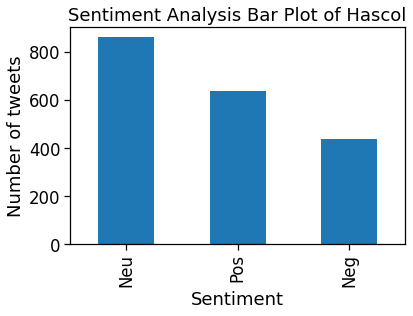

In [ ]:
#Create a bar chart to show the count of Positive, Neutral and Negative sentiments
h['sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis Bar Plot of Hascol')
plt.xlabel('Sentiment')
plt.ylabel('Number of tweets')
plt.show()

In [ ]:
print('total tweets', len(h))
print('positive tweets', sum(h['sentiment'] == 'Pos')/len(h)*100, '%')
print('negative tweets', sum(h['sentiment'] == 'Neg')/len(h)*100, '%')
print('neutral tweets',sum(h['sentiment'] == 'Neu')/len(h)*100, '%')

total tweets 1868
positive tweets 38.70449678800856 %
negative tweets 16.809421841541756 %
neutral tweets 44.486081370449675 %


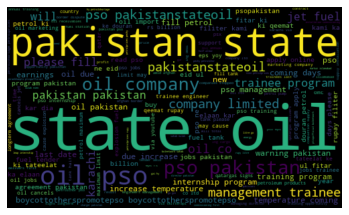

In [ ]:
from wordcloud import WordCloud
#Plot the workcloud Cloud
allWords = ' '.join([twts for twts in h['text_clean']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
h.to_csv("PSO_SA.csv")